## Procesamiento del Lenguaje Natural 1
### Carrera de Especialización en Inteligencia Artificial - FIUBA

## Desafío N° 3
### Predicción de próxima palabra

### 2º Bimestre 2025

### Grupo

| Autores               | E-mail                    | Nº SIU  |
|---------------------- |---------------------------|---------|
| Braian Desía          | b.desia@hotmail.com       | a1804   |


### Objetivo
El objetivo es entrenar un modelo de lenguaje basado en arquitectura de redes recurrentes a partir de un corpus de texto. En el transcurso del ejercicio se explorarán técnicas de generación de secuencias y se medirá la calidad de las mismas calculando la perplejidad. Parte del ejercicio consiste en estructurar adecuadamente el dataset para este problema.

### 0. Librerías

In [1]:
import numpy as np                  # for data manipulation
import pandas as pd                 # for data manipulation
import matplotlib.pyplot as plt     # for data visualization
import os                           # for file operations

import nltk

from tensorflow import keras

### 1. Dataset

In [2]:
nltk.download("gutenberg")
from nltk.corpus import gutenberg

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\Braian\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [3]:
file_ids = gutenberg.fileids()
print("Cantidad de archivos: ", len(file_ids))
print(file_ids)

Cantidad de archivos:  18
['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


Elegimos trabajar con Hamlet de Shakespeare.

In [4]:
text = gutenberg.raw('shakespeare-hamlet.txt')
with open('hamlet.txt','w') as file:
    file.write(text)               # Guardamos el corpus

In [5]:
text_lower = text.lower()                   # Quitamos las mayúsculas

### 2. Tokenización

Aplicamos el tokenizador de keras para convertir el texto en una secuencia de palabras.

In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer=Tokenizer()
tokenizer.fit_on_texts([text])
total_words=len(tokenizer.word_index) + 1

print("Cantidad de palabras: ", total_words)

Cantidad de palabras:  4818


In [7]:
tokenizer.word_index

{'the': 1,
 'and': 2,
 'to': 3,
 'of': 4,
 'i': 5,
 'you': 6,
 'a': 7,
 'my': 8,
 'it': 9,
 'in': 10,
 'that': 11,
 'ham': 12,
 'is': 13,
 'not': 14,
 'his': 15,
 'this': 16,
 'with': 17,
 'your': 18,
 'but': 19,
 'for': 20,
 'me': 21,
 'lord': 22,
 'as': 23,
 'what': 24,
 'he': 25,
 'be': 26,
 'so': 27,
 'him': 28,
 'haue': 29,
 'king': 30,
 'will': 31,
 'no': 32,
 'our': 33,
 'we': 34,
 'on': 35,
 'are': 36,
 'if': 37,
 'all': 38,
 'then': 39,
 'shall': 40,
 'by': 41,
 'thou': 42,
 'come': 43,
 'or': 44,
 'hamlet': 45,
 'good': 46,
 'do': 47,
 'hor': 48,
 'her': 49,
 'let': 50,
 'now': 51,
 'thy': 52,
 'how': 53,
 'more': 54,
 'they': 55,
 'from': 56,
 'enter': 57,
 'at': 58,
 'was': 59,
 'oh': 60,
 'like': 61,
 'most': 62,
 'there': 63,
 'well': 64,
 'know': 65,
 'selfe': 66,
 'would': 67,
 'them': 68,
 'loue': 69,
 'may': 70,
 "'tis": 71,
 'vs': 72,
 'sir': 73,
 'qu': 74,
 'which': 75,
 'did': 76,
 'why': 77,
 'laer': 78,
 'giue': 79,
 'thee': 80,
 'ile': 81,
 'must': 82,
 'hath': 

### 3. Generación de secuencias de n-gramas

Guardamos la secuencia de tokens en el texto. Esto debería ayudar al modelo a entender relaciones entre las palabras.

In [8]:
input_sequences = []
ngram_by_sentence = []
for line in text.split('\n'):
    token_list=tokenizer.texts_to_sequences([line])[0]
    for i in range(1,len(token_list)):
        n_gram_sequence=token_list[:i+1]
        input_sequences.append(n_gram_sequence)
        ngram_by_sentence.append(len(n_gram_sequence))


In [9]:
input_sequences = []
ngram_by_sentence = []
for line in text.split('\n'):
    token_list=tokenizer.texts_to_sequences([line])[0]
    if len(token_list) > 0:
        input_sequences.append(token_list)
        ngram_by_sentence.append(len(token_list))

In [10]:
input_sequences[:5]

[[1, 687, 4, 45, 41, 1886, 1887, 1888],
 [1180, 1889, 1890, 1891],
 [57, 407, 2, 1181, 177, 1892],
 [407, 1182, 63],
 [408, 162, 377, 21, 247, 882]]

In [11]:
ngram_by_sentence[:5]

[8, 4, 6, 3, 6]

In [12]:
max_sequence_length=max([len(x) for x in input_sequences])
print('La máxima secuencia de tokens en el texto es: ', max_sequence_length)

La máxima secuencia de tokens en el texto es:  14


Veamos su histograma de distribución

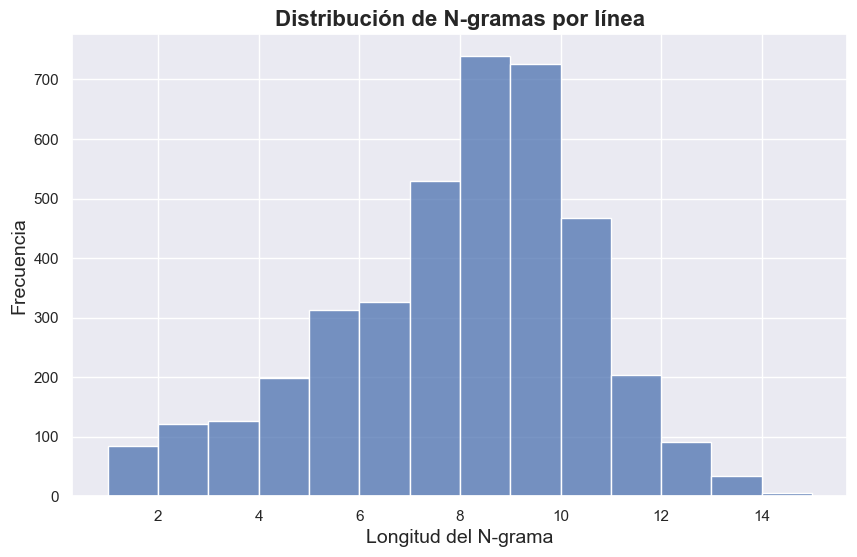

In [13]:
import seaborn as sns

# Configurar el estilo de Seaborn
sns.set(style='darkgrid')

# Crear el histograma
plt.figure(figsize=(10,6))
sns.histplot(ngram_by_sentence, bins=range(1, max(ngram_by_sentence)+2), kde=False)

# Añadir títulos y etiquetas
plt.title('Distribución de N-gramas por línea', fontsize=16, fontweight='bold')
plt.xlabel('Longitud del N-grama', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Mostrar el histograma
plt.show()

Definimos el tamaño máximo de contexto:

In [14]:
max_context_size = int(np.percentile(ngram_by_sentence, 90)-1)  # Restamos 1 porque el último token será el target
print(f'max_context_size: {max_context_size}')

max_context_size: 9


### 4. Train/Validation/Test split

In [15]:
from sklearn.model_selection import train_test_split

# Definimos fracciones para train/validation/test
val_size = 0.20
test_size = 0.10
train_size = 1 - (val_size + test_size)

rnd_seed = 42
# Generamos los sets
sequences_train_val, sequences_test, _, _, = train_test_split(input_sequences,
                                                input_sequences,
                                                test_size = test_size,
                                                random_state = rnd_seed)

sequences_train, sequences_val, _, _, = train_test_split(sequences_train_val,
                                                        sequences_train_val,
                                                        test_size = val_size / (train_size + val_size),
                                                        random_state = rnd_seed)

# Calculamos la cantidad de elementos de cada set
ntrain = len(sequences_train)
nval = len(sequences_val)
ntest = len(sequences_test)

print("Dimension del set de train:", ntrain)
print("Dimension del set de validation:", nval)
print("Dimension del set de test:", ntest)
print("")
print(f"Fracción de datos de train: {train_size:.2f}")
print(f"Fracción de datos de validation: {val_size:.2f}")
print(f"Fracción de datos de test: {test_size:.2f}")

Dimension del set de train: 2775
Dimension del set de validation: 794
Dimension del set de test: 397

Fracción de datos de train: 0.70
Fracción de datos de validation: 0.20
Fracción de datos de test: 0.10


Sobre el set de entrenamiento, adicionalmente, spliteamos las líneas que tienen mayor tamaño al contexto máximo definido y hacemos data augmentation generando secuencias más pequeñas.

In [16]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

sequences_train_augm = []

for seq in sequences_train:

  # si la secuencia tiene más términos que el tamaño de contexto máximo,
  # armo varias sub-secuencias de tamaño máximo
  extra_seq = []
  if len(seq) > (max_context_size+1):
    extra = len(seq)-(max_context_size+1) + 1
    for i in range(extra):
      extra_seq.append(seq[i:i+max_context_size+1])
  else: # si la secuencia tiene menos términos el tamaño de contexto máximo, dejo la secuencia como está
      extra_seq.append(seq)
  
  for seq in extra_seq:
    subseq = [seq[:i+2] for i in range(len(seq)-1)]                                                 # Generamos todas las sub-secuencias
    sequences_train_augm.append(pad_sequences(subseq, maxlen=max_context_size+1, padding='pre'))    # Paddeamos al tamaño de contexto máximo

sequences_train_augm = np.concatenate(sequences_train_augm, axis=0)
ntrain_augm = len(sequences_train_augm) 
print("Dimension del set de train:", ntrain_augm)
print(f"Incremento del set de training: x{ntrain_augm / ntrain:.2f}")

Dimension del set de train: 20631
Incremento del set de training: x7.43


In [17]:
sequences_train_augm[:10]

array([[   0,    0,    0,    0,    0,    0,    0,    0,  123,   17],
       [   0,    0,    0,    0,    0,    0,    0,    0,   48,   23],
       [   0,    0,    0,    0,    0,    0,    0,   48,   23,   42],
       [   0,    0,    0,    0,    0,    0,   48,   23,   42,  238],
       [   0,    0,    0,    0,    0,   48,   23,   42,  238,    3],
       [   0,    0,    0,    0,   48,   23,   42,  238,    3,   52],
       [   0,    0,    0,   48,   23,   42,  238,    3,   52,   66],
       [   0,    0,    0,    0,    0,    0,    0,    0, 4801,   21],
       [   0,    0,    0,    0,    0,    0,    0,    0,  140,   46],
       [   0,    0,    0,    0,    0,    0,    0,  140,   46,   51]])

In [18]:
sequences_train_augm.shape

(20631, 10)

In [19]:
X_train = sequences_train_augm[:,:-1]
y_train = sequences_train_augm[:,-1]

Padeamos el set de validation y lo dejamos preparado

In [20]:
sequences_val_pad = []

for seq in sequences_val:
    subseq = [seq[:i+2] for i in range(len(seq)-1)]                                                 # Generamos todas las sub-secuencias
    sequences_val_pad.append(pad_sequences(subseq, maxlen=max_context_size+1, padding='pre'))    # Paddeamos al tamaño de contexto máximo

sequences_val_pad = np.concatenate(sequences_val_pad, axis=0)

X_val = sequences_val_pad[:,:-1]
y_val = sequences_val_pad[:,-1]

### 5. Modelo #1

In [21]:
from types import SimpleNamespace

cfg = SimpleNamespace(**{})

#### 5.1 Arquitectura

Utilizamos la misma arquitectura vista en clase.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Dropout

cfg.embedding_dim = 300
cfg.dropout = 0.2
cfg.lstm_units = 64
cfg.fc_units = 32

model = Sequential()
model.add(Embedding(input_dim =total_words + 1, output_dim = cfg.embedding_dim, input_shape=(max_context_size,)))
model.add(LSTM(cfg.lstm_units, return_sequences=True))
model.add(Dropout(cfg.dropout))
model.add(LSTM(cfg.lstm_units)) # La última capa LSTM no lleva return_sequences
model.add(Dense(cfg.fc_units, activation='relu'))

# Predicción de clasificación con softmax
model.add(Dense(total_words + 1, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 9, 300)            1445700   
                                                                 
 lstm (LSTM)                 (None, 9, 64)             93440     
                                                                 
 dropout (Dropout)           (None, 9, 64)             0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 4819)              159027    
                                                                 
Total params: 1,733,271
Trainable params: 1,733,271
Non-

#### 5.2. Entrenamiento

In [ ]:
class PplCallback(keras.callbacks.Callback):

    '''
    Este callback es una solución ad-hoc para calcular al final de cada epoch de
    entrenamiento la métrica de Perplejidad sobre un conjunto de datos de validación.
    La perplejidad es una métrica cuantitativa para evaluar la calidad de la generación de secuencias.
    '''

    def __init__(self, val_data):
      # El callback lo inicializamos con secuencias de validación sobre las cuales
      # mediremos la perplejidad
      self.val_data = val_data

      self.target = []
      self.padded = []

      count = 0
      self.info = []

      # nos movemos en todas las secuencias de los datos de validación
      for seq in self.val_data:

        len_seq = len(seq)
        # armamos todas las subsecuencias
        subseq = [seq[:i] for i in range(len_seq)]
        self.target.extend([seq[i] for i in range(len_seq)])
        self.padded.append(pad_sequences(subseq, maxlen=max_context_size, padding='pre'))

        self.info.append((count,count+len_seq))
        count += len_seq

      self.padded = np.vstack(self.padded)


    def on_epoch_end(self, epoch, logs=None):

        # en `scores` iremos guardando la perplejidad de cada secuencia
        scores = []

        predictions = self.model.predict(self.padded,verbose=0)

        # para cada secuencia de validación
        for start,end in self.info:

          # en `probs` iremos guardando las probabilidades de los términos target
          epsilon = 1e-8
          probs = [predictions[idx_seq, idx_vocab] + epsilon for idx_seq, idx_vocab in zip(range(start, end), self.target[start:end])]

          # calculamos la perplejidad por medio de logaritmos
          scores.append(np.exp(-np.sum(np.log(probs))/(end-start)))

        # promediamos todos los scores e imprimimos el valor promedio
        print(f'\n mean perplexity: {np.mean(scores)} \n')

Epoch 1/50
643/645 [============================>.] - ETA: 0s - loss: 6.3268 - accuracy: 0.0399
 mean perplexity: 19086.72172405465 

645/645 [==============================] - 19s 25ms/step - loss: 6.3282 - accuracy: 0.0398 - val_loss: 6.9130 - val_accuracy: 0.0414
Epoch 2/50
645/645 [==============================] - ETA: 0s - loss: 6.1097 - accuracy: 0.0450
 mean perplexity: 174557.51156720278 

645/645 [==============================] - 19s 30ms/step - loss: 6.1097 - accuracy: 0.0450 - val_loss: 7.2465 - val_accuracy: 0.0479
Epoch 3/50
643/645 [============================>.] - ETA: 0s - loss: 5.9658 - accuracy: 0.0521
 mean perplexity: 158804.4232106366 

645/645 [==============================] - 16s 25ms/step - loss: 5.9673 - accuracy: 0.0522 - val_loss: 7.2808 - val_accuracy: 0.0496
Epoch 4/50
644/645 [============================>.] - ETA: 0s - loss: 5.8488 - accuracy: 0.0565
 mean perplexity: 256713.92248908704 

645/645 [==============================] - 17s 26ms/step - loss

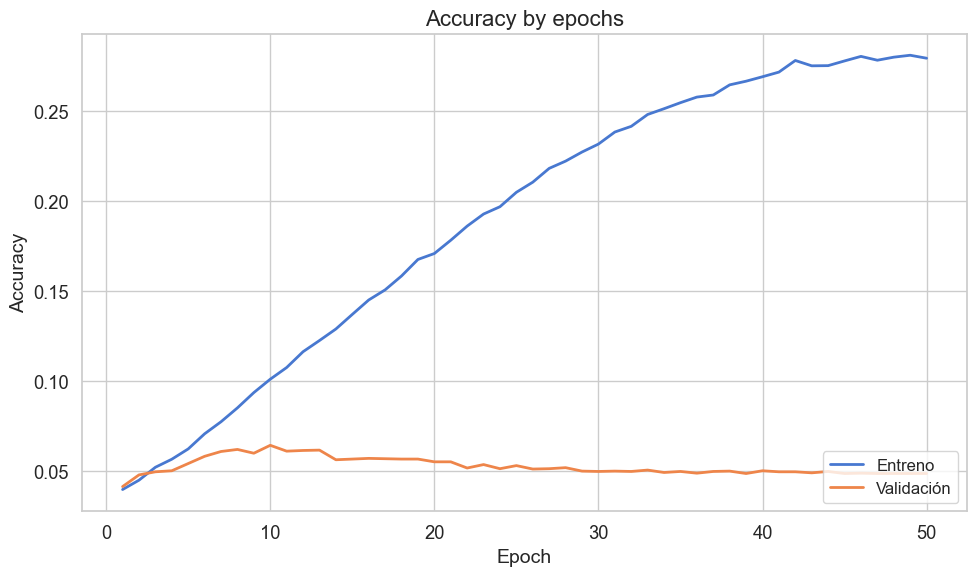

In [27]:
from tensorflow.keras.optimizers.schedules import CosineDecay
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.models import load_model

cfg.epochs = 50
cfg.batch_size = 32
cfg.lr = 1e-3

lr_schedule = CosineDecay(
        initial_learning_rate=cfg.lr,
        decay_steps=np.ceil(ntrain_augm / cfg.batch_size) * cfg.epochs,
        alpha=1e-4
    )

optimizer = Adam(learning_rate=lr_schedule)

early_stop = EarlyStopping(monitor='val_loss', 
                           patience=10,
                           verbose=1, 
                           restore_best_weights=True)

# Compilamos el modelo
model.compile(loss=SparseCategoricalCrossentropy(), optimizer=optimizer, metrics=['accuracy'])

filename = 'NWP_model-1.h5'

if os.path.exists(filename):
    # Load existing model
    model = load_model(filename)    
else:   
    # Train the model
    history = model.fit(X_train, 
                        y_train,
                        validation_data=(X_val, y_val),
                        callbacks=[
                                # early_stop,
                                PplCallback(sequences_val),
                                ], 
                        epochs = cfg.epochs, 
                        batch_size = cfg.batch_size,
                        verbose=1)
    
    # save the model
    model.save(filename)

    # Plot training history
    sns.set(style="whitegrid", palette="muted", font_scale=1.2)

    # Crear rango de épocas
    epoch_count = range(1, len(history.history['accuracy']) + 1)

    plt.figure(figsize=(10, 6))

    # Plotear accuracy de entrenamiento y validación
    sns.lineplot(x=epoch_count, y=history.history['accuracy'], label='Entreno', linewidth=2)
    sns.lineplot(x=epoch_count, y=history.history['val_accuracy'], label='Validación', linewidth=2)

    # Añadir títulos y etiquetas
    plt.title('Accuracy by epochs', fontsize=16)
    plt.xlabel('Epoch', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)

    # Mostrar leyenda y grid
    plt.legend(loc='lower right', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#### 5.3 Predicción próxima palabra

In [28]:
def predict_next_word(input_text, model, tokenizer, max_context_size):
  token_list = tokenizer.texts_to_sequences([input_text])[0]    # Encodeamos
  if len(token_list) >= max_context_size:
    token_list = token_list[-(max_context_size):]
  token_list = pad_sequences([token_list],maxlen=max_context_size-1,padding='pre')  # Padeamos
  
  predicted = model.predict(token_list,verbose=0)
  predicted_word_index = np.argmax(predicted, axis=1)
  for word,index in tokenizer.word_index.items():
    if index == predicted_word_index:
      return word
  return None

In [31]:
inputs = ["Taken to", 'My name is', 'to be or']

for input_text in inputs:
    print(f"Input text: {input_text}")
    max_sequence_length=model.input_shape[1]+1
    next_word = predict_next_word(input_text, model,tokenizer, max_context_size)
    print(f"Next word: {next_word}")
    print("")

Input text: Taken to
Next word: awhile

Input text: My name is
Next word: againe

Input text: to be or
Next word: i



### 6. Modelo #2

#### 6.1. Arquitectura

Usamos la misma arquitectura pero aplicamos Bidirectional en las capas LSTM para entender tanto hacia adelante como hacia atrás.

In [ ]:
model2 = Sequential()
model2.add(Embedding(input_dim =total_words + 1, output_dim = cfg.embedding_dim, input_shape=(max_context_size,)))
model2.add(Bidirectional(LSTM(cfg.lstm_units, return_sequences=True)))
model2.add(Dropout(cfg.dropout))
model2.add(LSTM(cfg.lstm_units)) # La última capa LSTM no lleva return_sequences
model2.add(Dense(cfg.fc_units, activation='relu'))

# Predicción de clasificación con softmax
model2.add(Dense(total_words + 1, activation='softmax'))

model2.summary()

#### 6.2. Entrenamiento

In [ ]:
# Compilamos el modelo
model2.compile(loss=SparseCategoricalCrossentropy(), optimizer=optimizer, metrics=['accuracy'])

filename = 'NWP_model-2.h5'

if os.path.exists(filename):
    # Load existing model
    model2 = load_model(filename)    
else:   
    # Train the model
    history = model2.fit(X_train, 
                        y_train,
                        validation_data=(X_val, y_val),
                        callbacks=[
                                # early_stop,
                                PplCallback(sequences_val),
                                ], 
                        epochs = cfg.epochs, 
                        batch_size = cfg.batch_size,
                        verbose=1)
    
    # save the model
    model2.save(filename)

    # Plot training history
    sns.set(style="whitegrid", palette="muted", font_scale=1.2)

    # Crear rango de épocas
    epoch_count = range(1, len(history.history['accuracy']) + 1)

    plt.figure(figsize=(10, 6))

    # Plotear accuracy de entrenamiento y validación
    sns.lineplot(x=epoch_count, y=history.history['accuracy'], label='Entreno', linewidth=2)
    sns.lineplot(x=epoch_count, y=history.history['val_accuracy'], label='Validación', linewidth=2)

    # Añadir títulos y etiquetas
    plt.title('Accuracy by epochs', fontsize=16)
    plt.xlabel('Epoch', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)

    # Mostrar leyenda y grid
    plt.legend(loc='lower right', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#### 6.3. Predicción próxima palabra

In [ ]:
inputs = ["Taken to", 'My name is', 'to be or']

for input_text in inputs:
    print(f"Input text: {input_text}")
    max_sequence_length=model.input_shape[1]+1
    next_word = predict_next_word(input_text, model2,tokenizer, max_context_size)
    print(f"Next word: {next_word}")
    print("")

### 7. Modelo #3

#### 7.1 Arquitectura

Partimos del modelo #1, aumentamos la cantidad de unidades LSTM.

In [ ]:
cfg.lstm_units = 150

model3 = Sequential()
model3.add(Embedding(input_dim =total_words + 1, output_dim = cfg.embedding_dim, input_shape=(max_context_size,)))
model3.add(LSTM(cfg.lstm_units, return_sequences=True))
model3.add(Dropout(cfg.dropout))
model3.add(LSTM(cfg.lstm_units)) # La última capa LSTM no lleva return_sequences
model3.add(Dense(cfg.fc_units, activation='relu'))

# Predicción de clasificación con softmax
model3.add(Dense(total_words + 1, activation='softmax'))

model3.summary()

#### 7.2 Entrenamiento

In [ ]:
# Compilamos el modelo
model3.compile(loss=SparseCategoricalCrossentropy(), optimizer=optimizer, metrics=['accuracy'])

filename = 'NWP_model-3.h5'

if os.path.exists(filename):
    # Load existing model
    model3 = load_model(filename)    
else:   
    # Train the model
    history = model3.fit(X_train, 
                        y_train,
                        validation_data=(X_val, y_val),
                        callbacks=[
                                # early_stop,
                                PplCallback(sequences_val),
                                ], 
                        epochs = cfg.epochs, 
                        batch_size = cfg.batch_size,
                        verbose=1)
    
    # save the model
    model3.save(filename)

    # Plot training history
    sns.set(style="whitegrid", palette="muted", font_scale=1.2)

    # Crear rango de épocas
    epoch_count = range(1, len(history.history['accuracy']) + 1)

    plt.figure(figsize=(10, 6))

    # Plotear accuracy de entrenamiento y validación
    sns.lineplot(x=epoch_count, y=history.history['accuracy'], label='Entreno', linewidth=2)
    sns.lineplot(x=epoch_count, y=history.history['val_accuracy'], label='Validación', linewidth=2)

    # Añadir títulos y etiquetas
    plt.title('Accuracy by epochs', fontsize=16)
    plt.xlabel('Epoch', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)

    # Mostrar leyenda y grid
    plt.legend(loc='lower right', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#### 7.3. Predicción próxima palabra

In [ ]:
inputs = ["Taken to", 'My name is', 'to be or']

for input_text in inputs:
    print(f"Input text: {input_text}")
    max_sequence_length=model.input_shape[1]+1
    next_word = predict_next_word(input_text, model3, tokenizer, max_context_size)
    print(f"Next word: {next_word}")
    print("")

### Conclusiones


In [ ]:
def generate_text(model, start_string, num_generate=50, temperature=1.0): # num_generate is number of words
    start_string_processed = start_string.lower() # Tokenizer is case-sensitive by default unless lower=True
    
    tokenized_start_string = tokenizer.texts_to_sequences([start_string_processed])[0]

    history = [0] * seq_length # Initialize with padding token (0)
    
    if len(tokenized_start_string) >= seq_length:
        history = tokenized_start_string[-seq_length:]
    else:
        history[-len(tokenized_start_string):] = tokenized_start_string
    
    input_eval = tf.expand_dims(history, 0)

    generated_words_list = []
    # model.reset_states()

    for i in range(num_generate):
        predictions_from_model = model(input_eval)
        
        scaled_logits = predictions_from_model / temperature
        predicted_id_tensor = tf.random.categorical(scaled_logits, num_samples=1)
        predicted_id = predicted_id_tensor[0, 0].numpy()
        
        # Handle potential prediction of padding token (index 0) or OOV if necessary
        # Though ideally, the model shouldn't predict padding if not in target data.
        # OOV token index is tokenizer.word_index[tokenizer.oov_token]
        # If predicted_id is 0 (padding), we might want to re-sample or pick a high prob word.
        # For simplicity here, we use what's predicted.
        word = int_to_word.get(predicted_id, tokenizer.oov_token if tokenizer.oov_token else "<unk>")
        
        generated_words_list.append(word)
        
        history.append(predicted_id)
        history = history[1:] # Slide the window
        
        input_eval = tf.expand_dims(history, 0)

    return start_string + " " + " ".join(generated_words_list)